In [157]:
# Import Dependencies
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress


In [158]:
# Read in CSV file.

file_path = pd.read_csv("./Resources/world-data-2023.csv")

file_path.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [159]:
#Checking all columns
file_path.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [160]:
#Created a copy of the dataframe to use for future reference.
copy_df = file_path.copy()
copy_df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [161]:
#Dropped columns not needed for this analysis.
cleaned_df = copy_df.drop(columns=["Abbreviation", 
                                   "Calling Code", 
                                   "Capital/Major City", 
                                   "Currency-Code", 
                                   "Largest city", 
                                   "Official language"])

cleaned_df.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,58.10%,"652,230","323,000",32.49,"8,672",149.9,2.30%,4.47,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,43.10%,"28,748","9,000",11.78,"4,536",119.05,1.40%,1.62,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,17.40%,"2,381,741","317,000",24.28,"150,006",151.36,2.00%,3.02,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,40.00%,468,NaN,7.20,469,NaN,NaN,1.27,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,47.50%,"1,246,700","117,000",40.73,"34,693",261.73,17.10%,5.52,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [162]:
#Checked dtypes for all columns.
cleaned_df.dtypes

Country                                       object
Density\n(P/Km2)                              object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       object
Infant mortality                             float64
Life expectancy                              float64
Maternal mortality ratio                     float64
Minimum wage                                  

In [163]:
#Converted Population to float.
cleaned_df['Population'].str.replace(",","")
cleaned_df['Population'] = pd.to_numeric(cleaned_df['Population'].str.replace(",",""))

In [164]:
#Converted Urban Population to float.
cleaned_df['Urban_population'].str.replace(",","")
cleaned_df['Urban_population'] = pd.to_numeric(cleaned_df['Urban_population'].str.replace(",",""))

In [165]:
#Quick check on dtypes again.
cleaned_df.dtypes

Country                                       object
Density\n(P/Km2)                              object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       object
Infant mortality                             float64
Life expectancy                              float64
Maternal mortality ratio                     float64
Minimum wage                                  

In [166]:
#Calculation for Urban Percentage
cleaned_df["Urban Percentage"] = (cleaned_df["Urban_population"] / cleaned_df["Population"]) * 100
cleaned_df.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Urban Percentage
0,Afghanistan,60,58.10%,"652,230","323,000",32.49,"8,672",149.9,2.30%,4.47,...,0.28,38041754.0,48.90%,9.30%,71.40%,11.12%,9797273.0,33.939110,67.709953,25.753999
1,Albania,105,43.10%,"28,748","9,000",11.78,"4,536",119.05,1.40%,1.62,...,1.20,2854191.0,55.70%,18.60%,36.60%,12.33%,1747593.0,41.153332,20.168331,61.229014
2,Algeria,18,17.40%,"2,381,741","317,000",24.28,"150,006",151.36,2.00%,3.02,...,1.72,43053054.0,41.20%,37.20%,66.10%,11.70%,31510100.0,28.033886,1.659626,73.189001
3,Andorra,164,40.00%,468,NaN,7.20,469,NaN,NaN,1.27,...,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801,87.984496
4,Angola,26,47.50%,"1,246,700","117,000",40.73,"34,693",261.73,17.10%,5.52,...,0.21,31825295.0,77.50%,9.20%,49.10%,6.89%,21061025.0,-11.202692,17.873887,66.176999


In [167]:
#Checked the average life expectancy.
average_life_expectancy = cleaned_df["Life expectancy"].mean()
average_life_expectancy

72.27967914438503

In [168]:
#1 is above the average life expectancy and 0 is below the average life expectancy.
def convert(value):
    return 1 if value > average_life_expectancy else 0

cleaned_df['Life expectancy group'] = cleaned_df['Life expectancy'].apply(lambda x: convert(x))

In [169]:
#Created a new dataframe in relation for health. 
health_df = cleaned_df[["Country", 
                       "Birth Rate", 
                       "Fertility Rate",
                       "Infant mortality",
                       "Maternal mortality ratio",
                       "Physicians per thousand",
                       "Life expectancy",
                       "Life expectancy group"]]
health_df = health_df.dropna()
health_df.head()

,Country,Birth Rate,Fertility Rate,Infant mortality,Maternal mortality ratio,Physicians per thousand,Life expectancy,Life expectancy group
0,Afghanistan,32.49,4.47,47.9,638.0,0.28,64.5,0
1,Albania,11.78,1.62,7.8,15.0,1.20,78.5,1
2,Algeria,24.28,3.02,20.1,112.0,1.72,76.7,1
4,Angola,40.73,5.52,51.6,241.0,0.21,60.8,0
5,Antigua and Barbuda,15.33,1.99,5.0,42.0,2.76,76.9,1


In [170]:
#Check for dtypes again
health_df.dtypes

Country                      object
Birth Rate                  float64
Fertility Rate              float64
Infant mortality            float64
Maternal mortality ratio    float64
Physicians per thousand     float64
Life expectancy             float64
Life expectancy group         int64
dtype: object

In [171]:
#Logistic Regression preparation.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [172]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = health_df['Life expectancy group']

# The X variable should include all features except the target
X = health_df.drop(columns=['Life expectancy', 'Life expectancy group'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

In [173]:
#Removed "Country" as it is not an actual predictor.
country_x_train = X_train["Country"]
del X_train["Country"]
X_train

,Birth Rate,Fertility Rate,Infant mortality,Maternal mortality ratio,Physicians per thousand
2,24.28,3.02,20.1,112.0,1.72
26,37.93,5.19,49.0,320.0,0.08
22,24.82,2.87,30.0,144.0,0.37
131,28.25,3.51,57.2,140.0,0.98
57,32.34,4.25,39.1,401.0,0.08
...,...,...,...,...,...
164,7.90,1.26,2.5,4.0,3.87
59,8.60,1.41,1.4,3.0,3.81
194,30.68,3.62,33.9,458.0,0.21
96,33.04,4.32,53.5,661.0,0.04


In [174]:
#Verify
country_x_train

2           Algeria
26     Burkina Faso
22         Botswana
131        Pakistan
57         Ethiopia
           ...     
164           Spain
59          Finland
194        Zimbabwe
96          Liberia
137            Peru
Name: Country, Length: 135, dtype: object

In [175]:
#Removed "Country" as it is not an actual predictor.
country_x_test = X_test["Country"]
del X_test["Country"]
X_test

,Birth Rate,Fertility Rate,Infant mortality,Maternal mortality ratio,Physicians per thousand
55,10.90,1.59,2.1,9.0,4.48
45,41.18,5.92,68.2,473.0,0.07
18,36.22,4.84,60.5,397.0,0.08
118,17.55,2.15,36.8,250.0,0.68
40,13.97,1.75,7.6,27.0,2.89
49,19.51,2.35,24.1,95.0,1.56
142,9.60,1.71,6.1,19.0,2.98
156,8.80,1.14,2.3,8.0,2.29
176,24.30,3.56,13.4,52.0,0.52
114,24.13,2.90,14.0,45.0,2.86


In [176]:
#Verifying
country_x_test

55                              Estonia
45     Democratic Republic of the Congo
18                                Benin
118                             Myanmar
40                           Costa Rica
49                   Dominican Republic
142                             Romania
156                           Singapore
176                               Tonga
114                            Mongolia
188                          Uzbekistan
27                              Burundi
166                               Sudan
109                           Mauritius
70                        Guinea-Bissau
14                             Barbados
81                  Republic of Ireland
178                             Tunisia
28                          Ivory Coast
39                Republic of the Congo
53                    Equatorial Guinea
32                               Canada
24                               Brunei
29                           Cape Verde
31                             Cameroon


In [177]:
from sklearn.preprocessing import StandardScaler
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [178]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)

# Generate training predictions
training_predictions = lr_model.predict(X_train_scaled)

# Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test_scaled)


In [179]:
# Import the model for sklearn confusion matrix
from sklearn.metrics import confusion_matrix

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print("Confusion Matrix for Training Data:")
print(training_matrix)

# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print("Confusion Matrix for Testing Data:")
print(test_matrix)

Confusion Matrix for Training Data:
[[53  4]
 [ 3 75]]
Confusion Matrix for Testing Data:
[[17  4]
 [ 2 22]]


In [180]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print("Classification Report for Training Data:")
print(training_report)

# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print("Classification Report for Testing Data:")
print(testing_report)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        57
           1       0.95      0.96      0.96        78

    accuracy                           0.95       135
   macro avg       0.95      0.95      0.95       135
weighted avg       0.95      0.95      0.95       135

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.85      0.92      0.88        24

    accuracy                           0.87        45
   macro avg       0.87      0.86      0.86        45
weighted avg       0.87      0.87      0.87        45



In [181]:
testing_predictions

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1], dtype=int64)

In [182]:
#1 means that it is predicting that country is above average life expectancy. 
Results = X_test
Results["Prediction"] = testing_predictions
Results

,Birth Rate,Fertility Rate,Infant mortality,Maternal mortality ratio,Physicians per thousand,Prediction
55,10.90,1.59,2.1,9.0,4.48,1
45,41.18,5.92,68.2,473.0,0.07,0
18,36.22,4.84,60.5,397.0,0.08,0
118,17.55,2.15,36.8,250.0,0.68,0
40,13.97,1.75,7.6,27.0,2.89,1
49,19.51,2.35,24.1,95.0,1.56,0
142,9.60,1.71,6.1,19.0,2.98,1
156,8.80,1.14,2.3,8.0,2.29,1
176,24.30,3.56,13.4,52.0,0.52,1
114,24.13,2.90,14.0,45.0,2.86,1


In [183]:
Training_Results = X_train
Training_Results["Prediction"] = training_predictions
Training_Results

,Birth Rate,Fertility Rate,Infant mortality,Maternal mortality ratio,Physicians per thousand,Prediction
2,24.28,3.02,20.1,112.0,1.72,0
26,37.93,5.19,49.0,320.0,0.08,0
22,24.82,2.87,30.0,144.0,0.37,0
131,28.25,3.51,57.2,140.0,0.98,0
57,32.34,4.25,39.1,401.0,0.08,0
...,...,...,...,...,...,...
164,7.90,1.26,2.5,4.0,3.87,1
59,8.60,1.41,1.4,3.0,3.81,1
194,30.68,3.62,33.9,458.0,0.21,0
96,33.04,4.32,53.5,661.0,0.04,0


In [184]:
#Concated Training_Results and Results to one dataframe.
overall_results = pd.concat([Training_Results, Results])
overall_results

,Birth Rate,Fertility Rate,Infant mortality,Maternal mortality ratio,Physicians per thousand,Prediction
2,24.28,3.02,20.1,112.0,1.72,0
26,37.93,5.19,49.0,320.0,0.08,0
22,24.82,2.87,30.0,144.0,0.37,0
131,28.25,3.51,57.2,140.0,0.98,0
57,32.34,4.25,39.1,401.0,0.08,0
...,...,...,...,...,...,...
160,41.75,6.07,76.6,829.0,0.02,0
4,40.73,5.52,51.6,241.0,0.21,0
10,14.00,1.73,19.2,26.0,3.45,1
116,18.94,2.42,19.2,70.0,0.73,1


In [185]:
#Concated Countries to one dataframe.
joined_countries = pd.concat([country_x_train, country_x_test])
joined_countries

2           Algeria
26     Burkina Faso
22         Botswana
131        Pakistan
57         Ethiopia
           ...     
160         Somalia
4            Angola
10       Azerbaijan
116         Morocco
170           Syria
Name: Country, Length: 180, dtype: object

In [186]:
final_results = pd.DataFrame(joined_countries).join(overall_results)
final_results

,Country,Birth Rate,Fertility Rate,Infant mortality,Maternal mortality ratio,Physicians per thousand,Prediction
2,Algeria,24.28,3.02,20.1,112.0,1.72,0
26,Burkina Faso,37.93,5.19,49.0,320.0,0.08,0
22,Botswana,24.82,2.87,30.0,144.0,0.37,0
131,Pakistan,28.25,3.51,57.2,140.0,0.98,0
57,Ethiopia,32.34,4.25,39.1,401.0,0.08,0
...,...,...,...,...,...,...,...
160,Somalia,41.75,6.07,76.6,829.0,0.02,0
4,Angola,40.73,5.52,51.6,241.0,0.21,0
10,Azerbaijan,14.00,1.73,19.2,26.0,3.45,1
116,Morocco,18.94,2.42,19.2,70.0,0.73,1


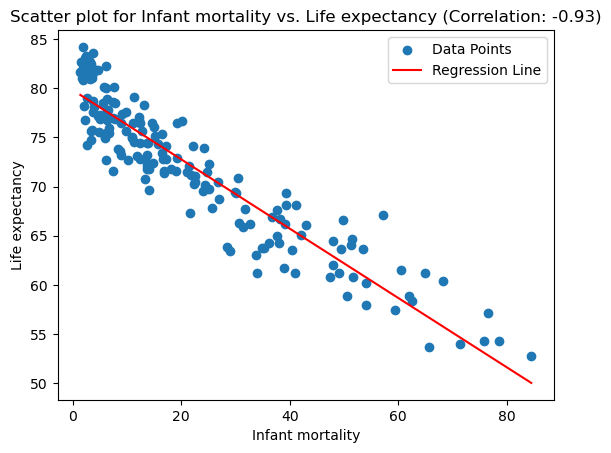

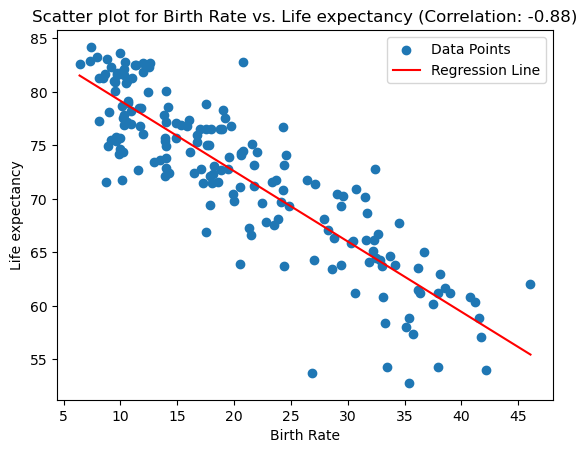

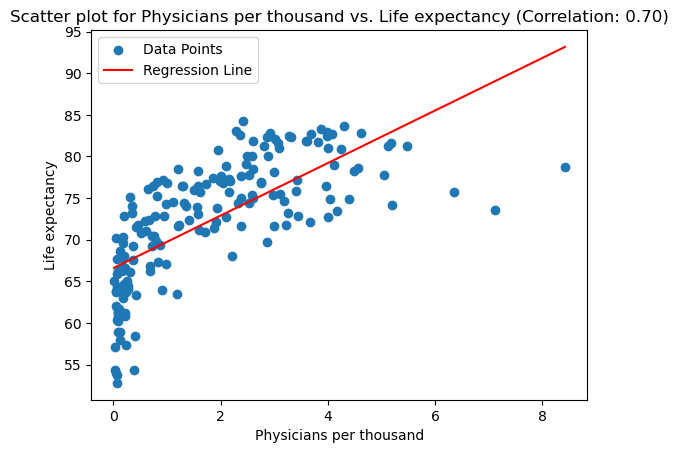

In [187]:
from sklearn.linear_model import LinearRegression

# Exclude the first and last columns to get the columns of interest

features_of_interest = health_df.columns[1:-2]

# Calculate correlation coefficients between each column of interest and 'Life expectancy'
correlations = {}
for feature in features_of_interest:
    correlation = health_df[feature].corr(health_df['Life expectancy'])
    correlations[feature] = correlation

# Convert the correlations dictionary to a DataFrame for better representation
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation with Life expectancy'])

# Sort the DataFrame by absolute correlation value in descending order
correlations_df = correlations_df.iloc[correlations_df['Correlation with Life expectancy'].abs().argsort()[::-1]]

# Reset the index of correlations_df after sorting
correlations_df.reset_index(drop=True, inplace=True)

# Get the two strongest correlations and the single weakest correlation
strongest_correlations = correlations_df.head(2)
weakest_correlation = correlations_df.tail(1)

# Create scatter plots with regression lines for the two strongest correlations and the weakest correlation
for idx, correlation in strongest_correlations.iterrows():
    feature = correlation['Feature']
    plt.scatter(health_df[feature], health_df['Life expectancy'], label='Data Points')
    model = LinearRegression()
    model.fit(health_df[feature].values.reshape(-1, 1), health_df['Life expectancy'])
    x_fit = np.linspace(health_df[feature].min(), health_df[feature].max(), num=100)
    y_fit = model.predict(x_fit.reshape(-1, 1))
    plt.plot(x_fit, y_fit, color='red', label='Regression Line')
    plt.title(f"Scatter plot for {feature} vs. Life expectancy (Correlation: {correlation['Correlation with Life expectancy']:.2f})")
    plt.xlabel(feature)
    plt.ylabel('Life expectancy')
    plt.legend()
    plt.savefig(f"Visualizations/LEScatter{idx}.png")
    plt.show()

for idx, correlation in weakest_correlation.iterrows():
    feature = correlation['Feature']
    plt.scatter(health_df[feature], health_df['Life expectancy'], label='Data Points')
    model = LinearRegression()
    model.fit(health_df[feature].values.reshape(-1, 1), health_df['Life expectancy'])
    x_fit = np.linspace(health_df[feature].min(), health_df[feature].max(), num=100)
    y_fit = model.predict(x_fit.reshape(-1, 1))
    plt.plot(x_fit, y_fit, color='red', label='Regression Line')
    plt.title(f"Scatter plot for {feature} vs. Life expectancy (Correlation: {correlation['Correlation with Life expectancy']:.2f})")
    plt.xlabel(feature)
    plt.ylabel('Life expectancy')
    plt.legend()
    plt.savefig("Visualizations/LEvsBirth.png")
    plt.show()

In [188]:
#Created a second dataframe in relation to finance.
financial_df = cleaned_df[["Country",
                           "CPI",
                           "CPI Change (%)",
                           "Gasoline Price",
                           "GDP",
                           "Minimum wage",
                           "Population: Labor force participation (%)",
                           "Tax revenue (%)",
                           "Total tax rate",
                           "Unemployment rate",
                            "Life expectancy",
                            "Life expectancy group"]]
financial_df = financial_df.dropna()
financial_df.head()

,Country,CPI,CPI Change (%),Gasoline Price,GDP,Minimum wage,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Life expectancy,Life expectancy group
0,Afghanistan,149.9,2.30%,$0.70,"$19,101,353,833",$0.43,48.90%,9.30%,71.40%,11.12%,64.5,0
1,Albania,119.05,1.40%,$1.36,"$15,278,077,447",$1.12,55.70%,18.60%,36.60%,12.33%,78.5,1
2,Algeria,151.36,2.00%,$0.28,"$169,988,236,398",$0.95,41.20%,37.20%,66.10%,11.70%,76.7,1
4,Angola,261.73,17.10%,$0.97,"$94,635,415,870",$0.71,77.50%,9.20%,49.10%,6.89%,60.8,0
6,Argentina,232.75,53.50%,$1.10,"$449,663,446,954",$3.35,61.30%,10.10%,106.30%,9.79%,76.5,1


In [189]:
#Checked dtypes.
financial_df.dtypes

Country                                       object
CPI                                           object
CPI Change (%)                                object
Gasoline Price                                object
GDP                                           object
Minimum wage                                  object
Population: Labor force participation (%)     object
Tax revenue (%)                               object
Total tax rate                                object
Unemployment rate                             object
Life expectancy                              float64
Life expectancy group                          int64
dtype: object

In [190]:
#Converted CPI from Object to float
financial_df['CPI'].str.replace(",","")
financial_df['CPI'] = pd.to_numeric(financial_df['CPI'].str.replace(",",""))

In [191]:
#Converted CPI Change % from Object to float
financial_df['CPI Change (%)'].str.replace("%","")
financial_df['CPI Change (%)'] = pd.to_numeric(financial_df['CPI Change (%)'].str.replace("%",""))

In [192]:
#Converted CPI from Gasoline Price to float
financial_df['Gasoline Price'].str.replace("$","")
financial_df['Gasoline Price'] = pd.to_numeric(financial_df['Gasoline Price'].str.replace("$",""))

C:\Users\ayelb\AppData\Local\Temp\ipykernel_37044\1343499684.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  financial_df['Gasoline Price'].str.replace("$","")
C:\Users\ayelb\AppData\Local\Temp\ipykernel_37044\1343499684.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  financial_df['Gasoline Price'] = pd.to_numeric(financial_df['Gasoline Price'].str.replace("$",""))


In [193]:
#Converted GDP from Object to float
financial_df['GDP'] = financial_df['GDP'].str.replace(",","")
financial_df['GDP'] = financial_df['GDP'].str.replace("$","")
financial_df['GDP'] = pd.to_numeric(financial_df['GDP'])

C:\Users\ayelb\AppData\Local\Temp\ipykernel_37044\64910209.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  financial_df['GDP'] = financial_df['GDP'].str.replace("$","")


In [194]:
#Converted Minimum Wage from Object to float
financial_df['Minimum wage'].str.replace("$","")
financial_df['Minimum wage'] = pd.to_numeric(financial_df['Minimum wage'].str.replace("$",""))

C:\Users\ayelb\AppData\Local\Temp\ipykernel_37044\3840923117.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  financial_df['Minimum wage'].str.replace("$","")
C:\Users\ayelb\AppData\Local\Temp\ipykernel_37044\3840923117.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  financial_df['Minimum wage'] = pd.to_numeric(financial_df['Minimum wage'].str.replace("$",""))


In [195]:
#Converted Population: Labor force participation (%) from Object to float
financial_df['Population: Labor force participation (%)'].str.replace("%","")
financial_df['Population: Labor force participation (%)'] = pd.to_numeric(financial_df['Population: Labor force participation (%)'].str.replace("%",""))

In [196]:
#Converted Tax Revenue (%) from Object to float
financial_df['Tax revenue (%)'].str.replace("%","")
financial_df['Tax revenue (%)'] = pd.to_numeric(financial_df['Tax revenue (%)'].str.replace("%",""))

In [197]:
#Converted Total Tax Rate from Object to float
financial_df['Total tax rate'].str.replace("%","")
financial_df['Total tax rate'] = pd.to_numeric(financial_df['Total tax rate'].str.replace("%",""))

In [198]:
#Converted Unemployment Rate from Object to float
financial_df['Unemployment rate'].str.replace("%","")
financial_df['Unemployment rate'] = pd.to_numeric(financial_df['Unemployment rate'].str.replace("%",""))

In [199]:
#Check dtypes after converting.
financial_df.dtypes

Country                                       object
CPI                                          float64
CPI Change (%)                               float64
Gasoline Price                               float64
GDP                                            int64
Minimum wage                                 float64
Population: Labor force participation (%)    float64
Tax revenue (%)                              float64
Total tax rate                               float64
Unemployment rate                            float64
Life expectancy                              float64
Life expectancy group                          int64
dtype: object

In [200]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = financial_df['Life expectancy group']

# The X variable should include all features except the target
X = financial_df.drop(columns=['Life expectancy group' , 'Life expectancy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

In [201]:
#Removed "Country" as it is not an actual predictor.
country_x_train = X_train["Country"]
del X_train["Country"]
X_train

,CPI,CPI Change (%),Gasoline Price,GDP,Minimum wage,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate
87,182.75,5.2,0.42,180161741180,0.41,68.8,11.7,28.4,4.59
82,108.15,0.8,1.57,395098666122,7.58,64.0,23.1,25.3,3.86
165,155.53,3.5,0.88,84008783756,0.35,53.9,11.9,55.2,4.20
142,123.78,3.8,1.16,250077444017,2.25,54.7,14.6,20.0,3.98
19,167.18,2.7,0.98,2446674101,0.32,66.7,16.0,35.3,2.34
...,...,...,...,...,...,...,...,...,...
29,110.50,1.1,1.02,1981845741,0.68,60.5,20.1,37.5,12.25
86,125.60,0.8,1.10,43743661972,1.49,39.3,15.1,28.6,14.72
84,162.47,3.9,1.11,16458071068,1.33,66.0,26.8,35.1,8.00
183,281.66,7.9,0.83,153781069118,0.84,54.2,20.1,45.2,8.88


In [202]:
#Removed "Country" as it is not an actual predictor.
country_x_test = X_test["Country"]
del X_test["Country"]
X_test

,CPI,CPI Change (%),Gasoline Price,GDP,Minimum wage,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate
157,115.34,2.7,1.32,105422304976,3.11,59.5,18.7,49.7,5.56
4,261.73,17.1,0.97,94635415870,0.71,77.5,9.2,49.1,6.89
37,140.95,3.5,0.68,323802808108,1.23,68.8,14.4,71.2,9.71
122,115.91,2.6,1.68,909070395161,10.29,63.6,23.0,41.2,3.20
14,134.09,4.1,1.81,5209000000,3.13,65.2,27.5,35.6,10.33
61,122.19,2.1,0.92,16657960228,1.46,52.9,10.2,47.1,20.00
28,111.61,-0.9,0.93,58792205642,0.36,57.0,11.8,50.1,3.32
65,268.36,7.2,0.92,66983634224,0.27,67.8,12.6,55.4,4.33
102,418.34,9.4,1.15,7666704427,0.12,76.7,17.3,34.5,5.65
85,105.48,0.5,1.06,5081769542380,6.77,61.7,11.9,46.7,2.29


In [203]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [204]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)

# Generate training predictions
training_predictions = lr_model.predict(X_train_scaled)

# Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test_scaled)

In [205]:
# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print("Confusion Matrix for Training Data:")
print(training_matrix)

# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print("Confusion Matrix for Testing Data:")
print(test_matrix)

Confusion Matrix for Training Data:
[[23 10]
 [ 7 53]]
Confusion Matrix for Testing Data:
[[12  4]
 [ 1 14]]


In [206]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print("Classification Report for Training Data:")
print(training_report)

# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print("Classification Report for Testing Data:")
print(testing_report)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73        33
           1       0.84      0.88      0.86        60

    accuracy                           0.82        93
   macro avg       0.80      0.79      0.80        93
weighted avg       0.81      0.82      0.82        93

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.78      0.93      0.85        15

    accuracy                           0.84        31
   macro avg       0.85      0.84      0.84        31
weighted avg       0.85      0.84      0.84        31



In [207]:
Results = X_test
Results["Prediction"] = testing_predictions
Results

,CPI,CPI Change (%),Gasoline Price,GDP,Minimum wage,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Prediction
157,115.34,2.7,1.32,105422304976,3.11,59.5,18.7,49.7,5.56,1
4,261.73,17.1,0.97,94635415870,0.71,77.5,9.2,49.1,6.89,0
37,140.95,3.5,0.68,323802808108,1.23,68.8,14.4,71.2,9.71,1
122,115.91,2.6,1.68,909070395161,10.29,63.6,23.0,41.2,3.20,1
14,134.09,4.1,1.81,5209000000,3.13,65.2,27.5,35.6,10.33,1
61,122.19,2.1,0.92,16657960228,1.46,52.9,10.2,47.1,20.00,1
28,111.61,-0.9,0.93,58792205642,0.36,57.0,11.8,50.1,3.32,0
65,268.36,7.2,0.92,66983634224,0.27,67.8,12.6,55.4,4.33,0
102,418.34,9.4,1.15,7666704427,0.12,76.7,17.3,34.5,5.65,0
85,105.48,0.5,1.06,5081769542380,6.77,61.7,11.9,46.7,2.29,1


In [208]:
Training_Results = X_train
Training_Results["Prediction"] = training_predictions
Training_Results

,CPI,CPI Change (%),Gasoline Price,GDP,Minimum wage,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Prediction
87,182.75,5.2,0.42,180161741180,0.41,68.8,11.7,28.4,4.59,0
82,108.15,0.8,1.57,395098666122,7.58,64.0,23.1,25.3,3.86,1
165,155.53,3.5,0.88,84008783756,0.35,53.9,11.9,55.2,4.20,0
142,123.78,3.8,1.16,250077444017,2.25,54.7,14.6,20.0,3.98,1
19,167.18,2.7,0.98,2446674101,0.32,66.7,16.0,35.3,2.34,0
...,...,...,...,...,...,...,...,...,...,...
29,110.50,1.1,1.02,1981845741,0.68,60.5,20.1,37.5,12.25,1
86,125.60,0.8,1.10,43743661972,1.49,39.3,15.1,28.6,14.72,1
84,162.47,3.9,1.11,16458071068,1.33,66.0,26.8,35.1,8.00,1
183,281.66,7.9,0.83,153781069118,0.84,54.2,20.1,45.2,8.88,1


In [209]:
#Concated Training_Results and Results to one dataframe.
overall_results = pd.concat([Training_Results, Results])
overall_results

,CPI,CPI Change (%),Gasoline Price,GDP,Minimum wage,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Prediction
87,182.75,5.2,0.42,180161741180,0.41,68.8,11.7,28.4,4.59,0
82,108.15,0.8,1.57,395098666122,7.58,64.0,23.1,25.3,3.86,1
165,155.53,3.5,0.88,84008783756,0.35,53.9,11.9,55.2,4.20,0
142,123.78,3.8,1.16,250077444017,2.25,54.7,14.6,20.0,3.98,1
19,167.18,2.7,0.98,2446674101,0.32,66.7,16.0,35.3,2.34,0
...,...,...,...,...,...,...,...,...,...,...
99,118.38,2.3,1.16,54219315600,2.41,61.6,16.9,42.6,6.35,1
41,109.82,0.8,1.26,60415553039,2.92,51.2,22.0,20.5,6.93,1
95,155.86,5.2,0.70,2460072444,0.41,67.9,31.6,13.6,23.41,1
153,144.00,1.8,1.16,51409167351,1.57,54.9,18.6,36.6,12.69,1


In [210]:
joined_countries = pd.concat([country_x_train, country_x_test])
joined_countries

87     Kazakhstan
82         Israel
165     Sri Lanka
142       Romania
19         Bhutan
          ...    
99      Lithuania
41        Croatia
95        Lesotho
153        Serbia
92           Laos
Name: Country, Length: 124, dtype: object

In [211]:
final_results = pd.DataFrame(joined_countries).join(overall_results)
final_results

,Country,CPI,CPI Change (%),Gasoline Price,GDP,Minimum wage,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Prediction
87,Kazakhstan,182.75,5.2,0.42,180161741180,0.41,68.8,11.7,28.4,4.59,0
82,Israel,108.15,0.8,1.57,395098666122,7.58,64.0,23.1,25.3,3.86,1
165,Sri Lanka,155.53,3.5,0.88,84008783756,0.35,53.9,11.9,55.2,4.20,0
142,Romania,123.78,3.8,1.16,250077444017,2.25,54.7,14.6,20.0,3.98,1
19,Bhutan,167.18,2.7,0.98,2446674101,0.32,66.7,16.0,35.3,2.34,0
...,...,...,...,...,...,...,...,...,...,...,...
99,Lithuania,118.38,2.3,1.16,54219315600,2.41,61.6,16.9,42.6,6.35,1
41,Croatia,109.82,0.8,1.26,60415553039,2.92,51.2,22.0,20.5,6.93,1
95,Lesotho,155.86,5.2,0.70,2460072444,0.41,67.9,31.6,13.6,23.41,1
153,Serbia,144.00,1.8,1.16,51409167351,1.57,54.9,18.6,36.6,12.69,1


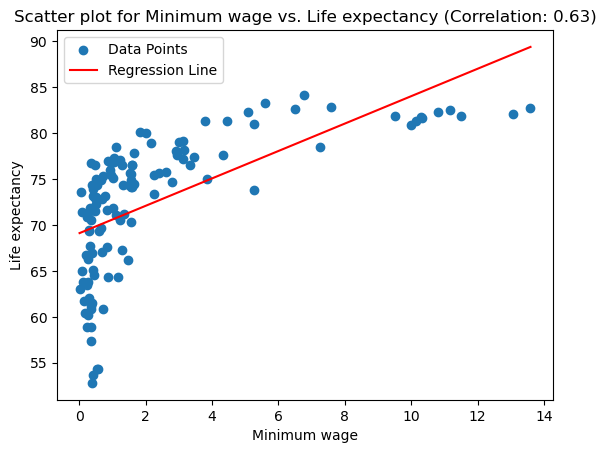

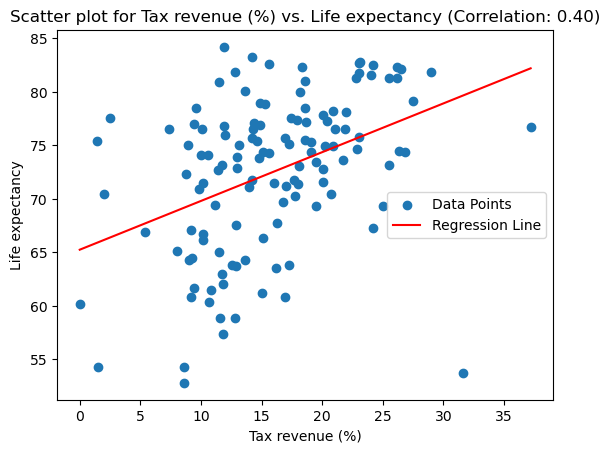

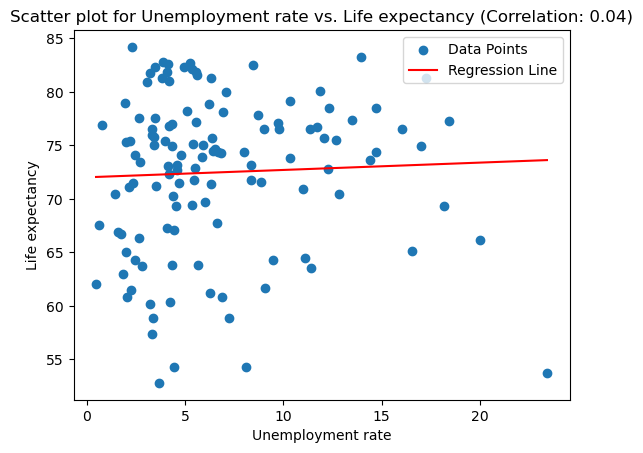

In [212]:
# Exclude the first and last columns to get the columns of interest

features_of_interest = financial_df.columns[1:-2]

# Calculate correlation coefficients between each column of interest and 'Life expectancy'
correlations = {}
for feature in features_of_interest:
    correlation = financial_df[feature].corr(financial_df['Life expectancy'])
    correlations[feature] = correlation

# Convert the correlations dictionary to a DataFrame for better representation
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation with Life expectancy'])

# Sort the DataFrame by absolute correlation value in descending order
correlations_df = correlations_df.iloc[correlations_df['Correlation with Life expectancy'].abs().argsort()[::-1]]

# Reset the index of correlations_df after sorting
correlations_df.reset_index(drop=True, inplace=True)

# Get the two strongest correlations and the single weakest correlation
strongest_correlations = correlations_df.head(2)
weakest_correlation = correlations_df.tail(1)

# Create scatter plots with regression lines for the two strongest correlations and the weakest correlation
for idx, correlation in strongest_correlations.iterrows():
    feature = correlation['Feature']
    plt.scatter(financial_df[feature], financial_df['Life expectancy'], label='Data Points')
    model = LinearRegression()
    model.fit(financial_df[feature].values.reshape(-1, 1), financial_df['Life expectancy'])
    x_fit = np.linspace(financial_df[feature].min(), financial_df[feature].max(), num=100)
    y_fit = model.predict(x_fit.reshape(-1, 1))
    plt.plot(x_fit, y_fit, color='red', label='Regression Line')
    plt.title(f"Scatter plot for {feature} vs. Life expectancy (Correlation: {correlation['Correlation with Life expectancy']:.2f})")
    plt.xlabel(feature)
    plt.ylabel('Life expectancy')
    plt.legend()
    plt.savefig(f"Visualizations/LEScatter_{idx}.png")
    plt.show()

for idx, correlation in weakest_correlation.iterrows():
    feature = correlation['Feature']
    plt.scatter(financial_df[feature], financial_df['Life expectancy'], label='Data Points')
    model = LinearRegression()
    model.fit(financial_df[feature].values.reshape(-1, 1), financial_df['Life expectancy'])
    x_fit = np.linspace(financial_df[feature].min(), financial_df[feature].max(), num=100)
    y_fit = model.predict(x_fit.reshape(-1, 1))
    plt.plot(x_fit, y_fit, color='red', label='Regression Line')
    plt.title(f"Scatter plot for {feature} vs. Life expectancy (Correlation: {correlation['Correlation with Life expectancy']:.2f})")
    plt.xlabel(feature)
    plt.ylabel('Life expectancy')
    plt.legend()
    plt.savefig("Visualizations/TaxRevvsInf.png")
    plt.show()

In [213]:
#Created the third and last dataframe for conditions.
conditions_df = cleaned_df[["Country",
                            "Density\n(P/Km2)",
                            "Agricultural Land( %)",
                            "Armed Forces size",
                            "Co2-Emissions",
                            "Forested Area (%)",
                            "Gross primary education enrollment (%)",
                            "Gross tertiary education enrollment (%)",
                            "Latitude",
                            "Longitude",
                            "Urban Percentage",
                            "Life expectancy", 
                            "Life expectancy group"]]
conditions_df = conditions_df.dropna()
conditions_df.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Armed Forces size,Co2-Emissions,Forested Area (%),Gross primary education enrollment (%),Gross tertiary education enrollment (%),Latitude,Longitude,Urban Percentage,Life expectancy,Life expectancy group
0,Afghanistan,60,58.10%,"323,000","8,672",2.10%,104.00%,9.70%,33.939110,67.709953,25.753999,64.5,0
1,Albania,105,43.10%,"9,000","4,536",28.10%,107.00%,55.00%,41.153332,20.168331,61.229014,78.5,1
2,Algeria,18,17.40%,"317,000","150,006",0.80%,109.90%,51.40%,28.033886,1.659626,73.189001,76.7,1
4,Angola,26,47.50%,"117,000","34,693",46.30%,113.50%,9.30%,-11.202692,17.873887,66.176999,60.8,0
5,Antigua and Barbuda,223,20.50%,0,557,22.30%,105.00%,24.80%,17.060816,-61.796428,24.506271,76.9,1


In [214]:
#Checked dtypes.
conditions_df.dtypes

Country                                     object
Density\n(P/Km2)                            object
Agricultural Land( %)                       object
Armed Forces size                           object
Co2-Emissions                               object
Forested Area (%)                           object
Gross primary education enrollment (%)      object
Gross tertiary education enrollment (%)     object
Latitude                                   float64
Longitude                                  float64
Urban Percentage                           float64
Life expectancy                            float64
Life expectancy group                        int64
dtype: object

In [215]:
#Converted Density\n(P/Km2) from Object to float
conditions_df['Density\n(P/Km2)'].str.replace(",","")
conditions_df['Density\n(P/Km2)'] = pd.to_numeric(conditions_df['Density\n(P/Km2)'].str.replace(",",""))

In [216]:
#Converted Agricultural Land ( %) from Object to float
conditions_df['Agricultural Land( %)'].str.replace("%","")
conditions_df['Agricultural Land( %)'] = pd.to_numeric(conditions_df['Agricultural Land( %)'].str.replace("%",""))

In [217]:
#Converted Armed Forces size from Object to float
conditions_df['Armed Forces size'].str.replace(",","")
conditions_df['Armed Forces size'] = pd.to_numeric(conditions_df['Armed Forces size'].str.replace(",",""))

In [218]:
#Converted Co2-Emissions from Object to float
conditions_df['Co2-Emissions'].str.replace(",","")
conditions_df['Co2-Emissions'] = pd.to_numeric(conditions_df['Co2-Emissions'].str.replace(",",""))

In [219]:
#Converted Forested Area from Object to float
conditions_df['Forested Area (%)'].str.replace("%","")
conditions_df['Forested Area (%)'] = pd.to_numeric(conditions_df['Forested Area (%)'].str.replace("%",""))

In [220]:
#Converted Gross primary education enrollment (%) from Object to float
conditions_df['Gross primary education enrollment (%)'].str.replace("%","")
conditions_df['Gross primary education enrollment (%)'] = pd.to_numeric(conditions_df['Gross primary education enrollment (%)'].str.replace("%",""))

In [221]:
#Converted Gross tertiary education enrollment (%) from Object to float
conditions_df['Gross tertiary education enrollment (%)'].str.replace("%","")
conditions_df['Gross tertiary education enrollment (%)'] = pd.to_numeric(conditions_df['Gross tertiary education enrollment (%)'].str.replace("%",""))

In [222]:
#Checked dtypes after conversion.
conditions_df.dtypes

Country                                     object
Density\n(P/Km2)                             int64
Agricultural Land( %)                      float64
Armed Forces size                            int64
Co2-Emissions                                int64
Forested Area (%)                          float64
Gross primary education enrollment (%)     float64
Gross tertiary education enrollment (%)    float64
Latitude                                   float64
Longitude                                  float64
Urban Percentage                           float64
Life expectancy                            float64
Life expectancy group                        int64
dtype: object

In [223]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = conditions_df['Life expectancy group']

# The X variable should include all features except the target
X = conditions_df.drop(columns=['Life expectancy group', 'Life expectancy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

In [224]:
#Removed "Country" as it is not an actual predictor.
country_x_train = X_train["Country"]
del X_train["Country"]
X_train

,Density\n(P/Km2),Agricultural Land( %),Armed Forces size,Co2-Emissions,Forested Area (%),Gross primary education enrollment (%),Gross tertiary education enrollment (%),Latitude,Longitude,Urban Percentage
92,32,10.3,129000,17763,82.1,102.4,15.0,19.856270,102.495496,35.644997
178,76,64.8,48000,29937,6.8,115.4,31.7,33.886917,9.537499,69.254003
9,109,32.4,21000,61448,46.9,103.1,85.1,47.516231,14.550072,58.515003
118,83,19.5,513000,25280,43.6,112.3,18.8,21.916221,95.955974,30.852000
156,8358,0.9,81000,37535,23.1,100.6,84.8,1.352083,103.819836,100.000000
...,...,...,...,...,...,...,...,...,...,...
175,152,70.2,10000,3000,3.1,123.8,14.5,8.619543,0.824782,42.248000
62,239,59.8,1000,532,48.4,98.0,2.7,13.443182,-15.310139,61.931008
194,38,41.9,51000,10983,35.5,109.9,10.0,-19.015438,29.154857,32.209998
102,203,61.4,15000,1298,33.2,142.5,0.8,-13.254308,34.301525,17.174000


In [225]:
#Removed "Country" as it is not an actual predictor.
country_x_test = X_test["Country"]
del X_test["Country"]
X_test

,Density\n(P/Km2),Agricultural Land( %),Armed Forces size,Co2-Emissions,Forested Area (%),Gross primary education enrollment (%),Gross tertiary education enrollment (%),Latitude,Longitude,Urban Percentage
14,668,23.3,1000,1276,14.7,99.4,65.4,13.193887,-59.543198,31.157913
185,281,71.7,148000,379025,13.1,101.2,60.0,55.378051,-3.435973,83.651999
77,464,60.4,3031000,2407672,23.8,113.0,28.1,20.593684,78.962880,34.472000
172,67,44.8,28000,11973,51.6,94.2,4.0,-6.369028,34.888822,34.500000
49,225,48.7,71000,25258,41.7,105.7,59.9,18.735693,-70.162651,81.828004
193,25,32.1,16000,5141,65.2,98.7,4.1,-13.133897,27.849332,44.071999
18,108,33.3,12000,6476,37.8,122.0,12.3,9.307690,2.315834,47.861001
78,151,31.5,676000,563325,49.9,106.4,36.3,-0.789275,113.921327,56.072364
43,131,12.2,16000,6626,18.7,99.3,75.9,35.126413,33.429859,66.804998
190,32,24.5,343000,164175,52.7,97.2,79.3,6.423750,-66.589730,88.240002


In [226]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [227]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

# Generate training predictions
training_predictions = lr_model.predict(X_train)

# Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

c:\Users\ayelb\anaconda3\envs\RUTDataViz2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [228]:
# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print("Confusion Matrix for Training Data:")
print(training_matrix)

# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print("Confusion Matrix for Testing Data:")
print(test_matrix)

Confusion Matrix for Training Data:
[[44  6]
 [ 6 69]]
Confusion Matrix for Testing Data:
[[15  6]
 [ 1 20]]


In [229]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print("Classification Report for Training Data:")
print(training_report)

# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print("Classification Report for Testing Data:")
print(testing_report)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        50
           1       0.92      0.92      0.92        75

    accuracy                           0.90       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.90      0.90      0.90       125

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81        21
           1       0.77      0.95      0.85        21

    accuracy                           0.83        42
   macro avg       0.85      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42



In [230]:
Results = X_test
Results["Prediction"] = testing_predictions
Results

,Density\n(P/Km2),Agricultural Land( %),Armed Forces size,Co2-Emissions,Forested Area (%),Gross primary education enrollment (%),Gross tertiary education enrollment (%),Latitude,Longitude,Urban Percentage,Prediction
14,668,23.3,1000,1276,14.7,99.4,65.4,13.193887,-59.543198,31.157913,1
185,281,71.7,148000,379025,13.1,101.2,60.0,55.378051,-3.435973,83.651999,1
77,464,60.4,3031000,2407672,23.8,113.0,28.1,20.593684,78.962880,34.472000,1
172,67,44.8,28000,11973,51.6,94.2,4.0,-6.369028,34.888822,34.500000,0
49,225,48.7,71000,25258,41.7,105.7,59.9,18.735693,-70.162651,81.828004,1
193,25,32.1,16000,5141,65.2,98.7,4.1,-13.133897,27.849332,44.071999,0
18,108,33.3,12000,6476,37.8,122.0,12.3,9.307690,2.315834,47.861001,0
78,151,31.5,676000,563325,49.9,106.4,36.3,-0.789275,113.921327,56.072364,1
43,131,12.2,16000,6626,18.7,99.3,75.9,35.126413,33.429859,66.804998,1
190,32,24.5,343000,164175,52.7,97.2,79.3,6.423750,-66.589730,88.240002,1


In [231]:
Training_Results = X_train
Training_Results["Prediction"] = training_predictions
Training_Results

,Density\n(P/Km2),Agricultural Land( %),Armed Forces size,Co2-Emissions,Forested Area (%),Gross primary education enrollment (%),Gross tertiary education enrollment (%),Latitude,Longitude,Urban Percentage,Prediction
92,32,10.3,129000,17763,82.1,102.4,15.0,19.856270,102.495496,35.644997,0
178,76,64.8,48000,29937,6.8,115.4,31.7,33.886917,9.537499,69.254003,0
9,109,32.4,21000,61448,46.9,103.1,85.1,47.516231,14.550072,58.515003,1
118,83,19.5,513000,25280,43.6,112.3,18.8,21.916221,95.955974,30.852000,0
156,8358,0.9,81000,37535,23.1,100.6,84.8,1.352083,103.819836,100.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
175,152,70.2,10000,3000,3.1,123.8,14.5,8.619543,0.824782,42.248000,0
62,239,59.8,1000,532,48.4,98.0,2.7,13.443182,-15.310139,61.931008,0
194,38,41.9,51000,10983,35.5,109.9,10.0,-19.015438,29.154857,32.209998,0
102,203,61.4,15000,1298,33.2,142.5,0.8,-13.254308,34.301525,17.174000,0


In [232]:
#Concated Training_Results and Results to one dataframe.
overall_results = pd.concat([Training_Results, Results])
overall_results

,Density\n(P/Km2),Agricultural Land( %),Armed Forces size,Co2-Emissions,Forested Area (%),Gross primary education enrollment (%),Gross tertiary education enrollment (%),Latitude,Longitude,Urban Percentage,Prediction
92,32,10.3,129000,17763,82.1,102.4,15.0,19.856270,102.495496,35.644997,0
178,76,64.8,48000,29937,6.8,115.4,31.7,33.886917,9.537499,69.254003,0
9,109,32.4,21000,61448,46.9,103.1,85.1,47.516231,14.550072,58.515003,1
118,83,19.5,513000,25280,43.6,112.3,18.8,21.916221,95.955974,30.852000,0
156,8358,0.9,81000,37535,23.1,100.6,84.8,1.352083,103.819836,100.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
2,18,17.4,317000,150006,0.8,109.9,51.4,28.033886,1.659626,73.189001,1
28,83,64.8,27000,9674,32.7,99.8,9.3,7.539989,-5.547080,51.239000,0
24,83,2.7,8000,7664,72.1,103.2,31.4,4.535277,114.727669,77.942001,1
166,25,28.7,124000,20000,8.1,76.8,16.9,12.862807,30.217636,34.936000,0


In [233]:
final_results = pd.DataFrame(joined_countries).join(overall_results)
final_results

,Country,Density\n(P/Km2),Agricultural Land( %),Armed Forces size,Co2-Emissions,Forested Area (%),Gross primary education enrollment (%),Gross tertiary education enrollment (%),Latitude,Longitude,Urban Percentage,Prediction
87,Kazakhstan,7.0,80.4,71000.0,247207.0,1.2,104.4,61.7,48.019573,66.923684,57.539998,1.0
82,Israel,400.0,24.6,178000.0,65166.0,7.7,104.9,63.4,31.046051,34.851612,92.501000,1.0
165,Sri Lanka,341.0,43.7,317000.0,23362.0,32.9,100.2,19.6,7.873054,80.771797,18.585002,0.0
142,Romania,84.0,58.8,126000.0,69259.0,30.1,85.2,49.4,45.943161,24.966760,54.083999,1.0
19,Bhutan,20.0,13.6,6000.0,1261.0,72.5,100.1,15.6,27.514162,90.433601,43.669144,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,Lithuania,43.0,47.2,34000.0,12963.0,34.8,103.9,72.4,55.169438,23.881275,67.855000,1.0
41,Croatia,73.0,27.6,18000.0,17488.0,34.4,96.5,67.9,45.100000,15.200000,57.241991,1.0
95,Lesotho,71.0,77.6,2000.0,2512.0,1.6,120.9,10.2,-29.609988,28.233608,28.585007,0.0
153,Serbia,100.0,39.3,32000.0,45221.0,31.1,100.3,67.2,44.016521,21.005859,56.260001,1.0


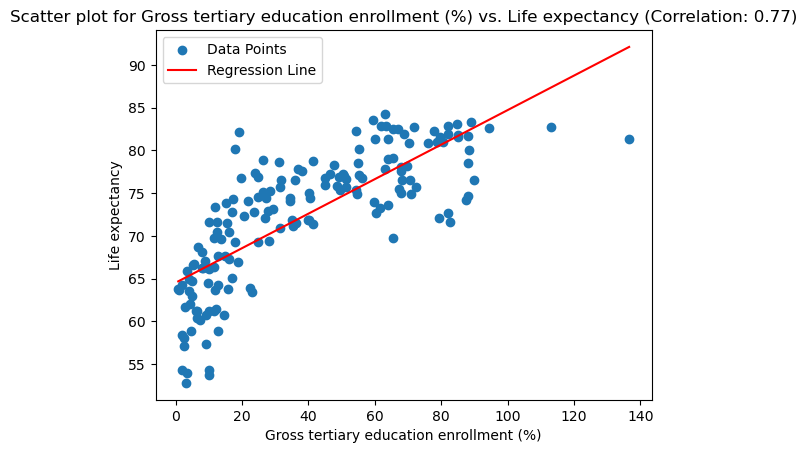

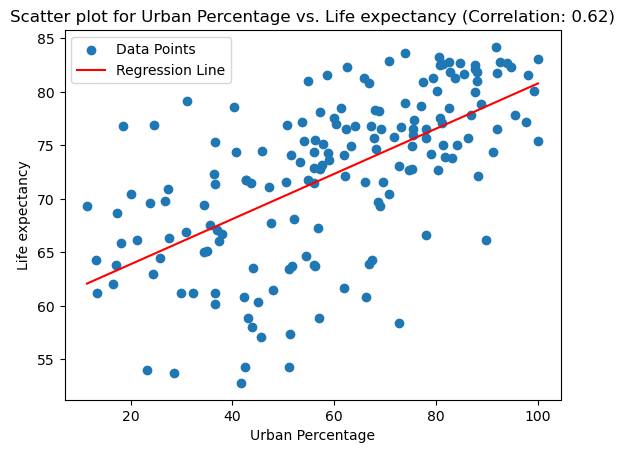

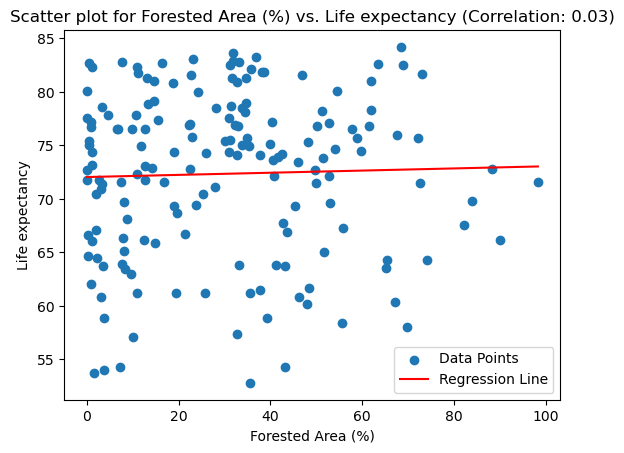

In [234]:
# Exclude the first and last columns to get the columns of interest

features_of_interest = conditions_df.columns[1:-2]

# Calculate correlation coefficients between each column of interest and 'Life expectancy'
correlations = {}
for feature in features_of_interest:
    correlation = conditions_df[feature].corr(conditions_df['Life expectancy'])
    correlations[feature] = correlation

# Convert the correlations dictionary to a DataFrame for better representation
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation with Life expectancy'])

# Sort the DataFrame by absolute correlation value in descending order
correlations_df = correlations_df.iloc[correlations_df['Correlation with Life expectancy'].abs().argsort()[::-1]]

# Reset the index of correlations_df after sorting
correlations_df.reset_index(drop=True, inplace=True)

# Get the two strongest correlations and the single weakest correlation
strongest_correlations = correlations_df.head(2)
weakest_correlation = correlations_df.tail(1)

# Create scatter plots with regression lines for the two strongest correlations and the weakest correlation
for idx, correlation in strongest_correlations.iterrows():
    feature = correlation['Feature']
    plt.scatter(conditions_df[feature], conditions_df['Life expectancy'], label='Data Points')
    model = LinearRegression()
    model.fit(conditions_df[feature].values.reshape(-1, 1), conditions_df['Life expectancy'])
    x_fit = np.linspace(conditions_df[feature].min(), conditions_df[feature].max(), num=100)
    y_fit = model.predict(x_fit.reshape(-1, 1))
    plt.plot(x_fit, y_fit, color='red', label='Regression Line')
    plt.title(f"Scatter plot for {feature} vs. Life expectancy (Correlation: {correlation['Correlation with Life expectancy']:.2f})")
    plt.xlabel(feature)
    plt.ylabel('Life expectancy')
    plt.legend()
    plt.savefig(f"Visualizations/LEScatter__{idx}.png")
    plt.show()

for idx, correlation in weakest_correlation.iterrows():
    feature = correlation['Feature']
    plt.scatter(conditions_df[feature], conditions_df['Life expectancy'], label='Data Points')
    model = LinearRegression()
    model.fit(conditions_df[feature].values.reshape(-1, 1), conditions_df['Life expectancy'])
    x_fit = np.linspace(conditions_df[feature].min(), conditions_df[feature].max(), num=100)
    y_fit = model.predict(x_fit.reshape(-1, 1))
    plt.plot(x_fit, y_fit, color='red', label='Regression Line')
    plt.title(f"Scatter plot for {feature} vs. Life expectancy (Correlation: {correlation['Correlation with Life expectancy']:.2f})")
    plt.xlabel(feature)
    plt.ylabel('Life expectancy')
    plt.legend()
    plt.savefig(f"Visualizations/LEvsForest.png")
    plt.show()